In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_csv("C:\\multi_final\\data\\2022년.csv", encoding='cp949')
df


,일시,대여소번호,대여소명,시간대,거치대수량,addr1,addr2,기온,강수형태,강수량,총생활인구수
0,2022-01-01,1124,1124. 발산역 6번 출구 뒤,0,3,우장산동,강서구,-4.4,0.0,0.0,32248.4049
1,2022-01-01,1124,1124. 발산역 6번 출구 뒤,1,4,우장산동,강서구,-2.5,0.0,0.0,30433.3054
2,2022-01-01,1124,1124. 발산역 6번 출구 뒤,2,3,우장산동,강서구,-1.6,0.0,0.0,30371.5035
3,2022-01-01,1124,1124. 발산역 6번 출구 뒤,3,3,우장산동,강서구,0.2,0.0,0.0,30196.7935
4,2022-01-01,1124,1124. 발산역 6번 출구 뒤,4,3,우장산동,강서구,0.6,0.0,0.0,29734.8866
...,...,...,...,...,...,...,...,...,...,...,...
78685,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,19,16,화곡6동,강서구,0.8,0.0,0.0,20310.9087
78686,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,20,14,화곡6동,강서구,-0.2,0.0,0.0,20972.5718
78687,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,21,16,화곡6동,강서구,-0.5,0.0,0.0,21133.8094
78688,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,22,15,화곡6동,강서구,-0.6,0.0,0.0,21321.0298


In [3]:
# 대여소 번호별 총 거치대 수를 사전으로 정의
total_docks = {
    1124: 6,
    1153: 17,
    1158: 20,
    1160: 20,
    1166: 10,
    2701: 26,
    2715: 25,
    2721: 12,
    2728: 55,
    3798: 11
}

In [4]:
# 거치대 수량을 해당 대여소의 총 거치대 수로 나누는 함수 정의
def calculate_dock_ratio(row):
    station_id = row['대여소번호']
    if station_id in total_docks:
        total_dock = total_docks[station_id]
        return row['거치대수량'] / total_dock
    else:
        return None  # 대여소 번호가 사전에 없는 경우 None 반환


In [5]:
# 새로운 열 '거치대비율'에 계산 결과 적용
df['거치대비율'] = df.apply(calculate_dock_ratio, axis=1)

In [6]:
df

,일시,대여소번호,대여소명,시간대,거치대수량,addr1,addr2,기온,강수형태,강수량,총생활인구수,거치대비율
0,2022-01-01,1124,1124. 발산역 6번 출구 뒤,0,3,우장산동,강서구,-4.4,0.0,0.0,32248.4049,0.500000
1,2022-01-01,1124,1124. 발산역 6번 출구 뒤,1,4,우장산동,강서구,-2.5,0.0,0.0,30433.3054,0.666667
2,2022-01-01,1124,1124. 발산역 6번 출구 뒤,2,3,우장산동,강서구,-1.6,0.0,0.0,30371.5035,0.500000
3,2022-01-01,1124,1124. 발산역 6번 출구 뒤,3,3,우장산동,강서구,0.2,0.0,0.0,30196.7935,0.500000
4,2022-01-01,1124,1124. 발산역 6번 출구 뒤,4,3,우장산동,강서구,0.6,0.0,0.0,29734.8866,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
78685,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,19,16,화곡6동,강서구,0.8,0.0,0.0,20310.9087,1.454545
78686,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,20,14,화곡6동,강서구,-0.2,0.0,0.0,20972.5718,1.272727
78687,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,21,16,화곡6동,강서구,-0.5,0.0,0.0,21133.8094,1.454545
78688,2022-12-31,3798,3798. 그랜드아이파크아파트 앞,22,15,화곡6동,강서구,-0.6,0.0,0.0,21321.0298,1.363636


In [7]:
# '일시'와 '시간대'를 결합하여 'datetime' 열 생성
df['datetime'] = pd.to_datetime(df['일시']) + pd.to_timedelta(df['시간대'], unit='h')


In [8]:
# '대여소번호'를 'ID'로, '거치대수량'을 'count'로 이름 변경
df.rename(columns={'대여소번호': 'ID', '거치대수량': 'count', '일시' : 'date', '시간대' : 'hour', '거치대비율':'ratio'}, inplace=True)

In [9]:
# 필요한 열만 선택
df = df[['ID', 'date', 'hour', 'count', 'datetime', 'ratio']]
df

,ID,date,hour,count,datetime,ratio
0,1124,2022-01-01,0,3,2022-01-01 00:00:00,0.500000
1,1124,2022-01-01,1,4,2022-01-01 01:00:00,0.666667
2,1124,2022-01-01,2,3,2022-01-01 02:00:00,0.500000
3,1124,2022-01-01,3,3,2022-01-01 03:00:00,0.500000
4,1124,2022-01-01,4,3,2022-01-01 04:00:00,0.500000
...,...,...,...,...,...,...
78685,3798,2022-12-31,19,16,2022-12-31 19:00:00,1.454545
78686,3798,2022-12-31,20,14,2022-12-31 20:00:00,1.272727
78687,3798,2022-12-31,21,16,2022-12-31 21:00:00,1.454545
78688,3798,2022-12-31,22,15,2022-12-31 22:00:00,1.363636


In [10]:
# 이제 'datetime'과 'ID'를 기준으로 정렬합니다.
df.sort_values(by=['ID', 'datetime'], inplace=True)

C:\Users\hyeon\AppData\Local\Temp\ipykernel_26400\655660988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['ID', 'datetime'], inplace=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler

# 정규화를 위한 스케일러 초기화
scaler = MinMaxScaler()

In [12]:
df['ratio_scaled'] = scaler.fit_transform(df['ratio'].values.reshape(-1,1))
# 결과 확인
print(df.head())

     ID        date  hour  count            datetime     ratio  ratio_scaled
0  1124  2022-01-01     0      3 2022-01-01 00:00:00  0.500000      0.034884
1  1124  2022-01-01     1      4 2022-01-01 01:00:00  0.666667      0.046512
2  1124  2022-01-01     2      3 2022-01-01 02:00:00  0.500000      0.034884
3  1124  2022-01-01     3      3 2022-01-01 03:00:00  0.500000      0.034884
4  1124  2022-01-01     4      3 2022-01-01 04:00:00  0.500000      0.034884


C:\Users\hyeon\AppData\Local\Temp\ipykernel_26400\1817087592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratio_scaled'] = scaler.fit_transform(df['ratio'].values.reshape(-1,1))


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [14]:
# 시퀀스 데이터로 변환하는 함수
def create_dataset(X, y, look_back=1):
    Xs, ys = [], []
    for i in range(len(X) - look_back):
        v = X.iloc[i:(i + look_back)].values
        Xs.append(v)
        ys.append(y.iloc[i + look_back])
    return np.array(Xs), np.array(ys)

look_back = 3  # 과거 3개의 시간 단계를 사용하여 다음 단계를 예측

Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 11s - 2ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 2/10
5033/5033 - 9s - 2ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 3/10
5033/5033 - 9s - 2ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/10
5033/5033 - 9s - 2ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/10
5033/5033 - 9s - 2ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/10
5033/5033 - 10s - 2ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 7/10
5033/5033 - 10s - 2ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 8/10
5033/5033 - 10s - 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/10
5033/5033 - 9s - 2ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/10
5033/5033 - 10s - 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 12s - 2ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 2/10
5033/5033 - 20s - 4ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/10
5033/5033 - 10s - 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/10
5033/5033 - 10s - 2ms/step - loss: 0.0010 - val_loss: 7.9300e-04
Epoch 5/10
5033/5033 - 10s - 2ms/step - loss: 9.1878e-04 - val_loss: 8.5383e-04
Epoch 6/10
5033/5033 - 11s - 2ms/step - loss: 8.9210e-04 - val_loss: 7.9238e-04
Epoch 7/10
5033/5033 - 18s - 4ms/step - loss: 8.9100e-04 - val_loss: 8.1531e-04
Epoch 8/10
5033/5033 - 10s - 2ms/step - loss: 8.7688e-04 - val_loss: 8.1291e-04
Epoch 9/10
5033/5033 - 10s - 2ms/step - loss: 8.6498e-04 - val_loss: 8.8643e-04
Epoch 10/10
5033/5033 - 11s - 2ms/step - loss: 8.5548e-04 - val_loss: 0.0013
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 11s - 2ms/step - loss: 0.0018 - val_loss: 8.4709e-04
Epoch 2/10
5033/5033 - 9s - 2ms/step - loss: 7.5684e-04 - val_loss: 5.4668e-04
Epoch 3/10
5033/5033 - 10s - 2ms/step - loss: 6.2422e-04 - val_loss: 4.9838e-04
Epoch 4/10
5033/5033 - 9s - 2ms/step - loss: 5.1816e-04 - val_loss: 4.1354e-04
Epoch 5/10
5033/5033 - 9s - 2ms/step - loss: 4.7069e-04 - val_loss: 4.7146e-04
Epoch 6/10
5033/5033 - 10s - 2ms/step - loss: 4.4471e-04 - val_loss: 8.6907e-04
Epoch 7/10
5033/5033 - 8s - 2ms/step - loss: 4.4278e-04 - val_loss: 4.3140e-04
Epoch 8/10
5033/5033 - 9s - 2ms/step - loss: 4.1361e-04 - val_loss: 5.0233e-04
Epoch 9/10
5033/5033 - 9s - 2ms/step - loss: 4.1853e-04 - val_loss: 4.0282e-04
Epoch 10/10
5033/5033 - 12s - 2ms/step - loss: 4.0760e-04 - val_loss: 3.9343e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 18s - 3ms/step - loss: 0.0014 - val_loss: 6.2387e-04
Epoch 2/10
5033/5033 - 9s - 2ms/step - loss: 4.5758e-04 - val_loss: 3.8165e-04
Epoch 3/10
5033/5033 - 9s - 2ms/step - loss: 3.3220e-04 - val_loss: 3.8269e-04
Epoch 4/10
5033/5033 - 8s - 2ms/step - loss: 2.9614e-04 - val_loss: 2.1383e-04
Epoch 5/10
5033/5033 - 11s - 2ms/step - loss: 2.6723e-04 - val_loss: 2.2047e-04
Epoch 6/10
5033/5033 - 8s - 2ms/step - loss: 2.6110e-04 - val_loss: 2.3845e-04
Epoch 7/10
5033/5033 - 9s - 2ms/step - loss: 2.5324e-04 - val_loss: 1.9802e-04
Epoch 8/10
5033/5033 - 8s - 2ms/step - loss: 2.5778e-04 - val_loss: 2.2021e-04
Epoch 9/10
5033/5033 - 8s - 2ms/step - loss: 2.4520e-04 - val_loss: 2.8024e-04
Epoch 10/10
5033/5033 - 8s - 2ms/step - loss: 2.3688e-04 - val_loss: 2.4500e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 16s - 3ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 2/10
5033/5033 - 13s - 3ms/step - loss: 0.0015 - val_loss: 8.7984e-04
Epoch 3/10
5033/5033 - 7s - 1ms/step - loss: 0.0012 - val_loss: 7.6639e-04
Epoch 4/10
5033/5033 - 8s - 2ms/step - loss: 0.0011 - val_loss: 8.1773e-04
Epoch 5/10
5033/5033 - 8s - 2ms/step - loss: 9.6148e-04 - val_loss: 9.2281e-04
Epoch 6/10
5033/5033 - 9s - 2ms/step - loss: 8.7937e-04 - val_loss: 9.7568e-04
Epoch 7/10
5033/5033 - 11s - 2ms/step - loss: 8.6355e-04 - val_loss: 8.6143e-04
Epoch 8/10
5033/5033 - 10s - 2ms/step - loss: 8.4496e-04 - val_loss: 7.4479e-04
Epoch 9/10
5033/5033 - 9s - 2ms/step - loss: 8.4683e-04 - val_loss: 6.9150e-04
Epoch 10/10
5033/5033 - 9s - 2ms/step - loss: 8.1390e-04 - val_loss: 7.1849e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 11s - 2ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 2/10
5033/5033 - 11s - 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/10
5033/5033 - 9s - 2ms/step - loss: 9.5967e-04 - val_loss: 9.7080e-04
Epoch 4/10
5033/5033 - 8s - 1ms/step - loss: 8.6472e-04 - val_loss: 0.0010
Epoch 5/10
5033/5033 - 7s - 1ms/step - loss: 8.0425e-04 - val_loss: 8.2193e-04
Epoch 6/10
5033/5033 - 8s - 2ms/step - loss: 7.8379e-04 - val_loss: 8.2720e-04
Epoch 7/10
5033/5033 - 8s - 2ms/step - loss: 7.5211e-04 - val_loss: 8.8003e-04
Epoch 8/10
5033/5033 - 8s - 2ms/step - loss: 7.2640e-04 - val_loss: 0.0010
Epoch 9/10
5033/5033 - 8s - 2ms/step - loss: 6.8997e-04 - val_loss: 7.1036e-04
Epoch 10/10
5033/5033 - 8s - 2ms/step - loss: 6.7528e-04 - val_loss: 8.7888e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 12s - 2ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 2/10
5033/5033 - 12s - 2ms/step - loss: 9.3521e-04 - val_loss: 6.7199e-04
Epoch 3/10
5033/5033 - 14s - 3ms/step - loss: 7.7261e-04 - val_loss: 6.2810e-04
Epoch 4/10
5033/5033 - 21s - 4ms/step - loss: 6.9713e-04 - val_loss: 6.5546e-04
Epoch 5/10
5033/5033 - 15s - 3ms/step - loss: 6.4916e-04 - val_loss: 6.2399e-04
Epoch 6/10
5033/5033 - 11s - 2ms/step - loss: 6.2867e-04 - val_loss: 5.4739e-04
Epoch 7/10
5033/5033 - 12s - 2ms/step - loss: 6.0830e-04 - val_loss: 6.3508e-04
Epoch 8/10
5033/5033 - 11s - 2ms/step - loss: 5.8364e-04 - val_loss: 5.4580e-04
Epoch 9/10
5033/5033 - 20s - 4ms/step - loss: 5.6574e-04 - val_loss: 5.6181e-04
Epoch 10/10
5033/5033 - 10s - 2ms/step - loss: 5.8685e-04 - val_loss: 6.5096e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 12s - 2ms/step - loss: 0.0027 - val_loss: 7.2584e-04
Epoch 2/10
5033/5033 - 9s - 2ms/step - loss: 0.0011 - val_loss: 5.9660e-04
Epoch 3/10
5033/5033 - 10s - 2ms/step - loss: 8.2273e-04 - val_loss: 4.8454e-04
Epoch 4/10
5033/5033 - 9s - 2ms/step - loss: 6.9357e-04 - val_loss: 9.4166e-04
Epoch 5/10
5033/5033 - 10s - 2ms/step - loss: 6.3945e-04 - val_loss: 5.8925e-04
Epoch 6/10
5033/5033 - 11s - 2ms/step - loss: 5.9190e-04 - val_loss: 6.2023e-04
Epoch 7/10
5033/5033 - 13s - 2ms/step - loss: 5.9171e-04 - val_loss: 4.5442e-04
Epoch 8/10
5033/5033 - 22s - 4ms/step - loss: 5.6394e-04 - val_loss: 4.8485e-04
Epoch 9/10
5033/5033 - 14s - 3ms/step - loss: 5.4941e-04 - val_loss: 8.0639e-04
Epoch 10/10
5033/5033 - 10s - 2ms/step - loss: 5.3888e-04 - val_loss: 4.3219e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 11s - 2ms/step - loss: 0.0017 - val_loss: 5.8297e-04
Epoch 2/10
5033/5033 - 8s - 2ms/step - loss: 5.5791e-04 - val_loss: 1.8712e-04
Epoch 3/10
5033/5033 - 9s - 2ms/step - loss: 3.2127e-04 - val_loss: 5.6783e-04
Epoch 4/10
5033/5033 - 8s - 2ms/step - loss: 2.5845e-04 - val_loss: 1.6221e-04
Epoch 5/10
5033/5033 - 10s - 2ms/step - loss: 2.2136e-04 - val_loss: 1.8504e-04
Epoch 6/10
5033/5033 - 11s - 2ms/step - loss: 2.0498e-04 - val_loss: 1.5373e-04
Epoch 7/10
5033/5033 - 11s - 2ms/step - loss: 1.9286e-04 - val_loss: 1.5319e-04
Epoch 8/10
5033/5033 - 8s - 2ms/step - loss: 1.8873e-04 - val_loss: 1.7303e-04
Epoch 9/10
5033/5033 - 8s - 2ms/step - loss: 1.8796e-04 - val_loss: 1.4113e-04
Epoch 10/10
5033/5033 - 11s - 2ms/step - loss: 1.7936e-04 - val_loss: 2.0608e-04
Epoch 1/10


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5033/5033 - 11s - 2ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 2/10
5033/5033 - 9s - 2ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/10
5033/5033 - 6s - 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/10
5033/5033 - 7s - 1ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/10
5033/5033 - 6s - 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/10
5033/5033 - 8s - 2ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 7/10
5033/5033 - 6s - 1ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/10
5033/5033 - 6s - 1ms/step - loss: 0.0011 - val_loss: 9.5227e-04
Epoch 9/10
5033/5033 - 8s - 2ms/step - loss: 0.0011 - val_loss: 9.6180e-04
Epoch 10/10
5033/5033 - 6s - 1ms/step - loss: 0.0011 - val_loss: 0.0012


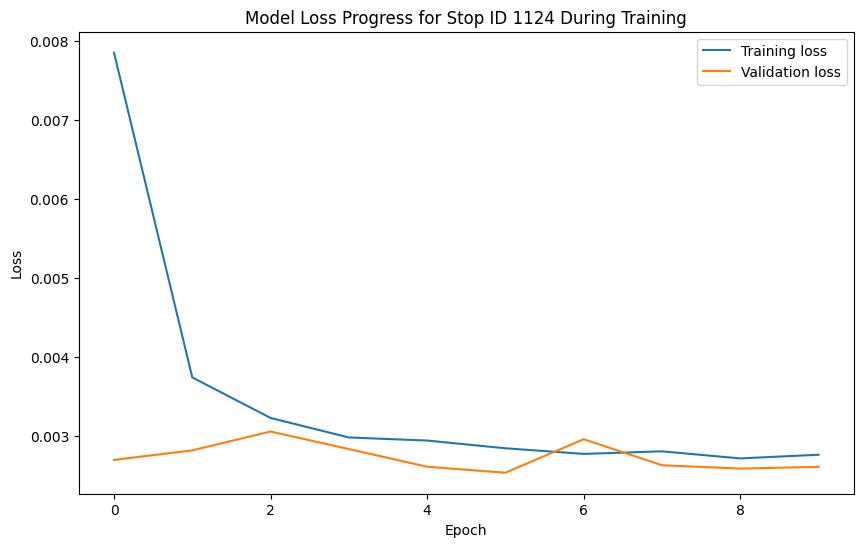

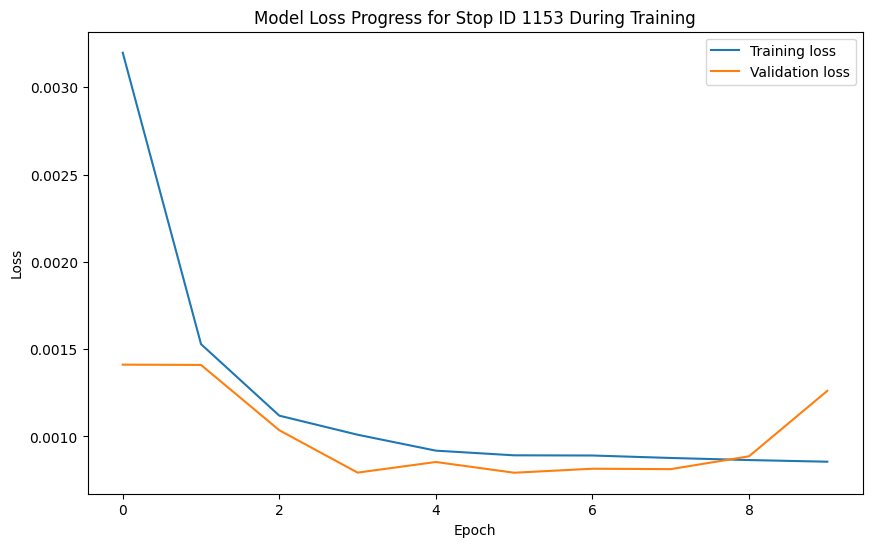

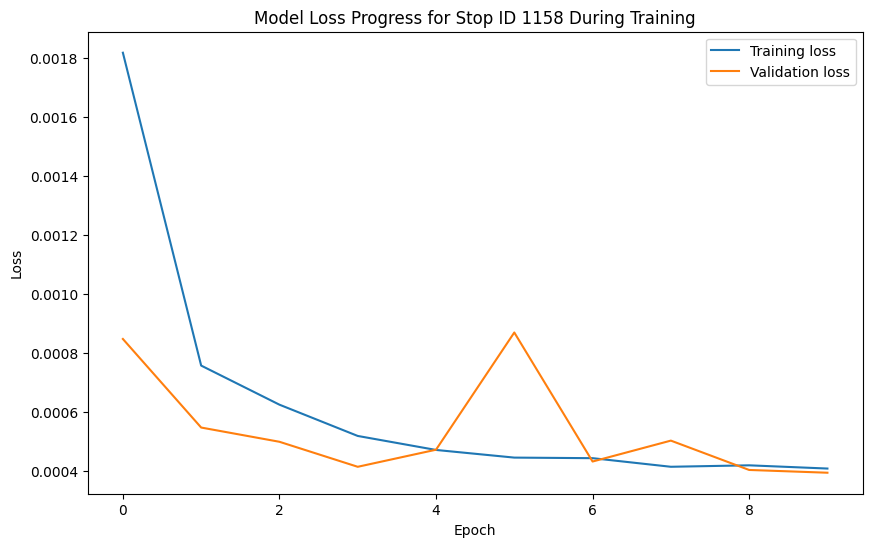

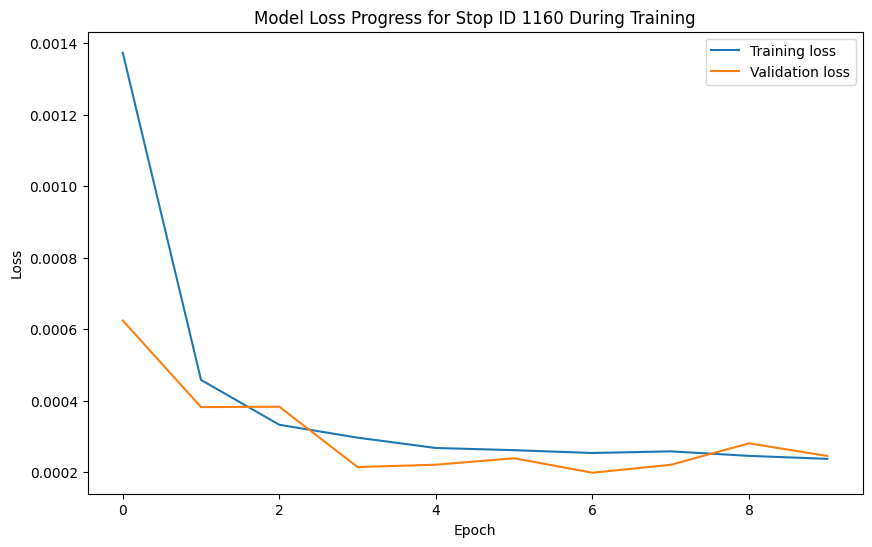

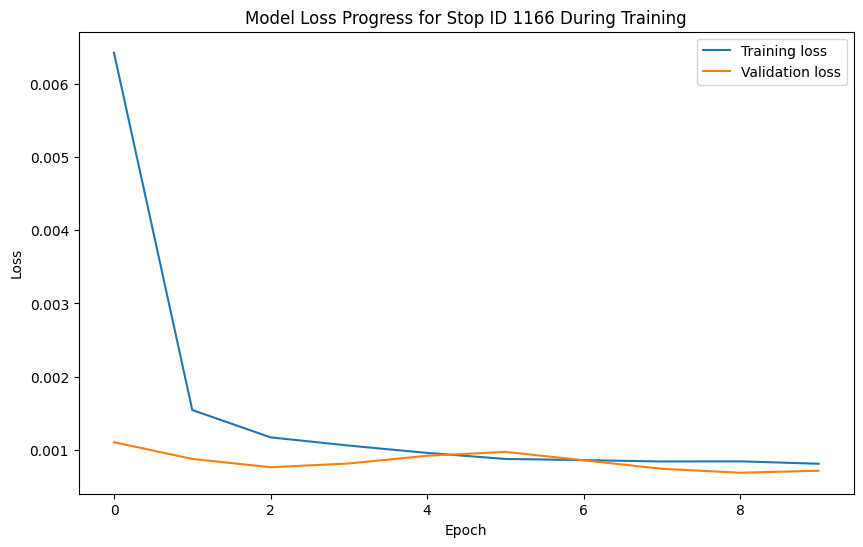

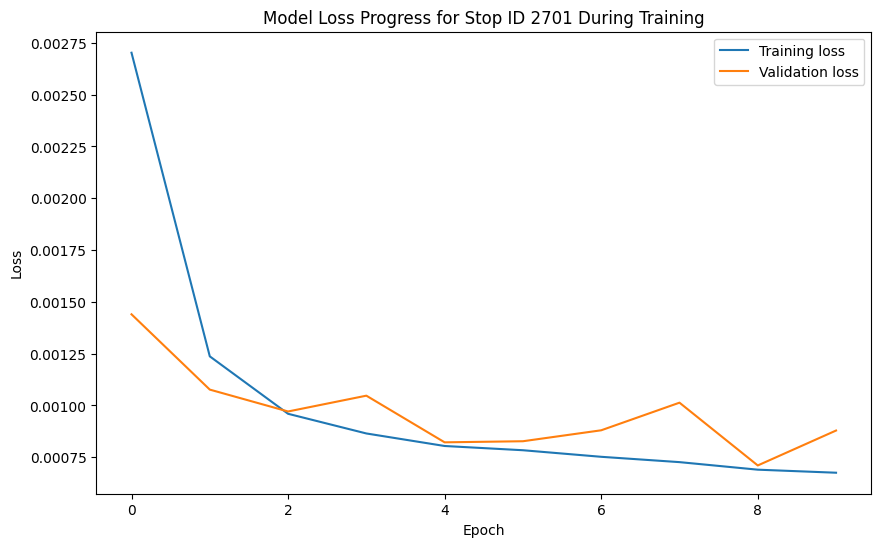

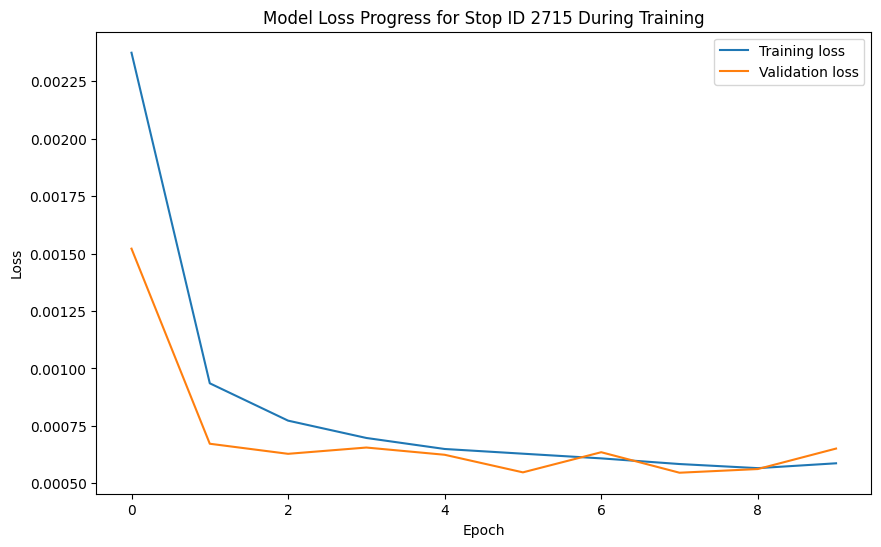

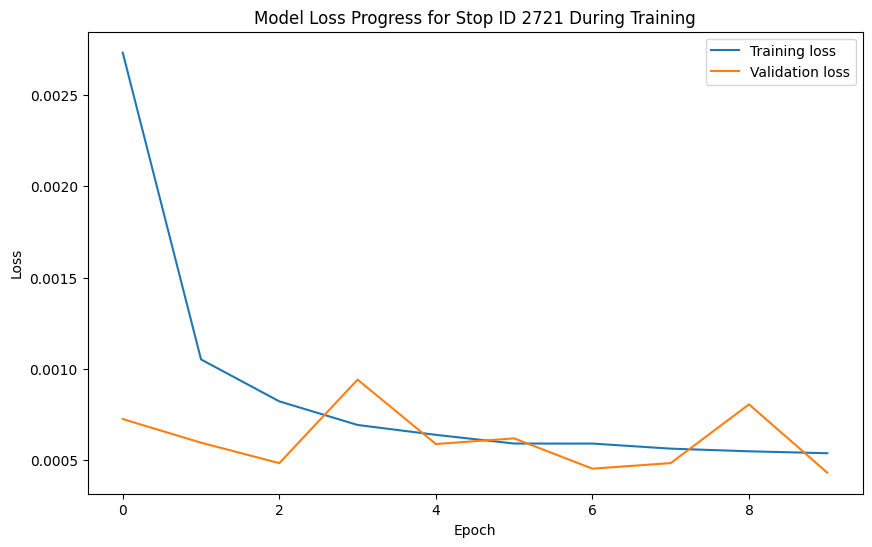

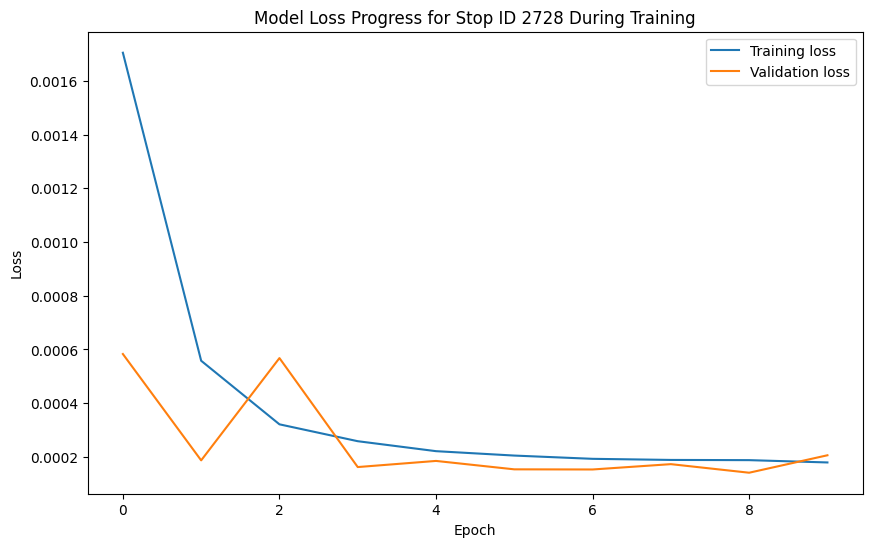

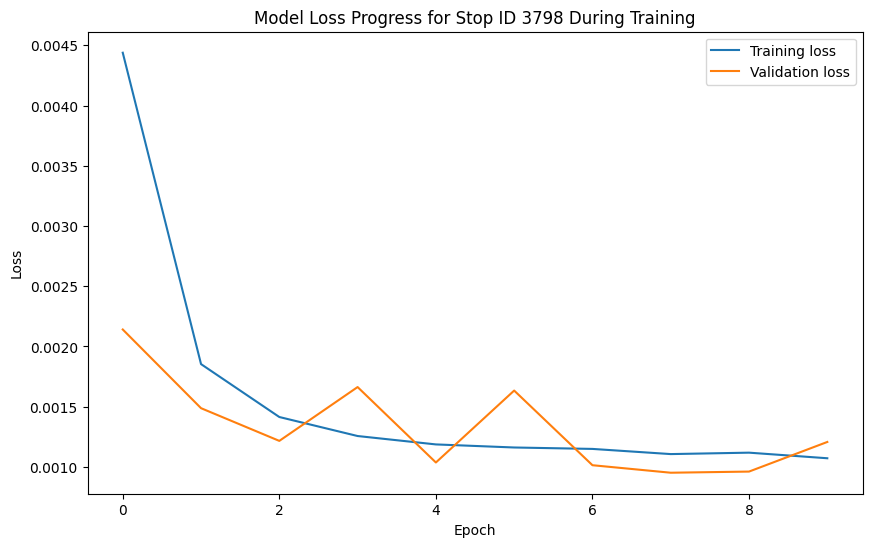

In [15]:
import matplotlib.pyplot as plt

# 정류소별로 모델 학습
unique_stops = df['ID'].unique()

# 각 정류소별로 학습 과정을 저장하기 위한 딕셔너리 초기화
history_dict = {}

for stop in unique_stops:
    stop_data = df[df['ID'] == stop]
    
    X = stop_data[['hour', 'ratio_scaled']]  # 입력 변수
    y = stop_data['ratio_scaled']  # 예측할 변수
    
    # 시퀀스 데이터 생성
    X_seq, y_seq = create_dataset(X, y, look_back)
    
    # 학습 및 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # 모델 학습
    history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2, validation_split=0.2)
    
    # 학습 과정 저장
    history_dict[stop] = history

# 각 정류소별 모델의 학습 과정을 그래프로 나타내기
for stop, history in history_dict.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title(f'Model Loss Progress for Stop ID {stop} During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [16]:
from tensorflow.keras.models import save_model

save_model(model, 'my_model.keras')



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


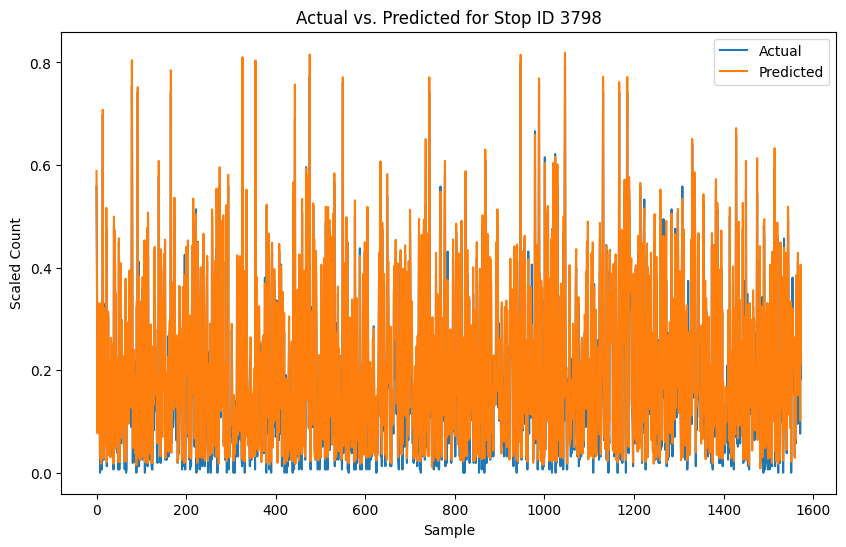

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 정류소를 선택합니다. 예를 들어, unique_stops의 첫 번째 정류소 ID를 사용합니다.
stop = unique_stops[9]

# 해당 정류소에 대한 데이터를 준비합니다.
stop_data = df[df['ID'] == stop]
X = stop_data[['hour', 'ratio_scaled']]
y = stop_data['ratio_scaled']

# 시퀀스 데이터 생성
X_seq, y_seq = create_dataset(X, y, look_back)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# 해당 정류소에 대해 이미 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 예측 값과 실제 값을 그래프로 비교합니다.
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'Actual vs. Predicted for Stop ID {stop}')
plt.xlabel('Sample')
plt.ylabel('Scaled Count')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"모델의 결정 계수(R^2): {r2}")

모델의 결정 계수(R^2): 0.9478508903390094
